Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv(r"C:\Users\Nirbhay\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")

In [84]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [85]:
df.shape

(2111, 17)

In [86]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [87]:
df.duplicated().sum()

24

In [88]:
df.drop_duplicates(inplace=True)

In [89]:
df.shape

(2087, 17)

In [90]:
#Modifying the output column and its values according to the question

In [91]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [92]:
df['NObeyesdad'] = df['NObeyesdad'].replace(['Obesity_Type_II', 'Obesity_Type_III'], 'ExtremeObesity')
df['NObeyesdad'] = df['NObeyesdad'].replace('Insufficient_Weight', 'Underweight')
df['NObeyesdad'] = df['NObeyesdad'].replace(['Overweight_Level_I','Overweight_Level_II'], 'Overweight')
df['NObeyesdad'] = df['NObeyesdad'].replace('Obesity_Type_I', 'Obesity')

In [93]:
df = df.rename(columns={'NObeyesdad': 'Result'})

In [94]:
df['Result'].unique()

array(['Normal_Weight', 'Overweight', 'Obesity', 'Underweight',
       'ExtremeObesity'], dtype=object)

**EDA**

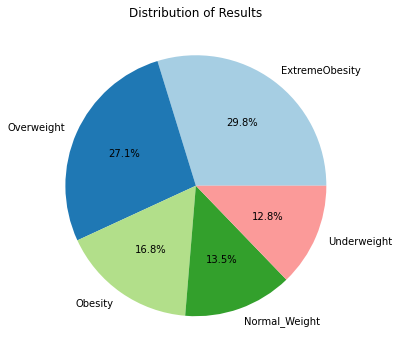

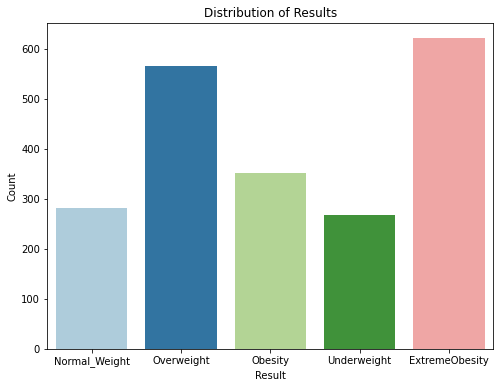

In [95]:
# Pie chart
plt.figure(figsize=(8, 6))
df['Result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Distribution of Results')
plt.ylabel('')
plt.show()

# Countplot or Barchart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Result', palette='Paired')
plt.title('Distribution of Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Most of the people in the datset fall into Overweight and ExtremeObesity with 27% and 30% respectively.

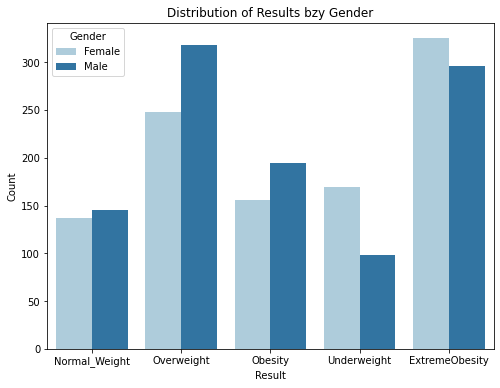

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Result', hue='Gender', palette='Paired')
plt.title('Distribution of Results bzy Gender')
plt.xlabel('Result')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

We  can see that most women are extreme obesed than men whereas men are more overweight than women.
We can also see that most women are underweight as well.

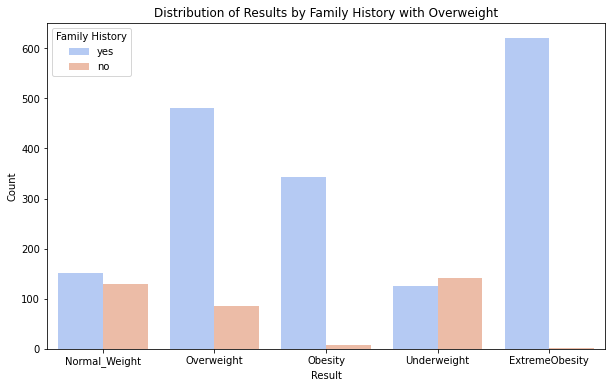

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='family_history_with_overweight', palette='coolwarm')
plt.title('Distribution of Results by Family History with Overweight')
plt.xlabel('Result')
plt.ylabel('Count')
plt.legend(title='Family History')
plt.show()


We can clearly see that family history affects the current situation.

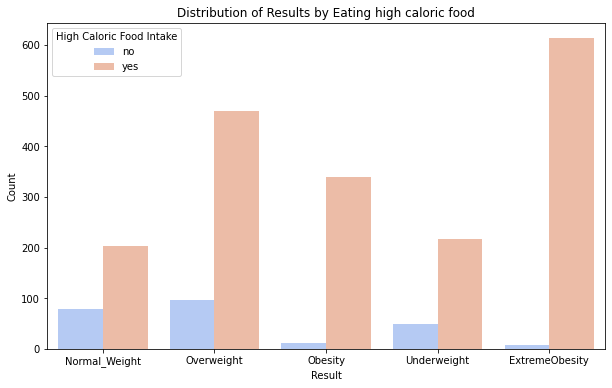

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='FAVC', palette='coolwarm')
plt.title('Distribution of Results by Eating high caloric food')
plt.xlabel('Result')
plt.ylabel('Count')
plt.legend(title='High Caloric Food Intake')
plt.show()

An obvious reason that high caloric food leads to obesity.

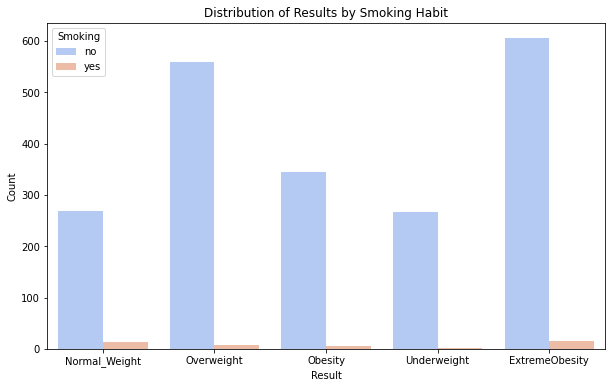

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='SMOKE', palette='coolwarm')
plt.title('Distribution of Results by Smoking Habit')
plt.xlabel('Result')
plt.ylabel('Count')
plt.legend(title='Smoking')
plt.show()

The graph suggests that the person who does not smoke have high chances of obesity as well as underweight.

But in the real scenario its completely opposite, may have happen that the people may have lied to smoking parameter here,

In [100]:
How much water do you drink daily? (CH20) = less than a liter, between 1 and 2L, more than 2 L
Do you monitor the calories you eat daily? (SCC) = Yes, No
How often do you have physical activity? (FAF) = I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 day
How much time do you use technological devices? (TUE) = 0-2 hours, 3-5 hours, more than 5 hours
How often do you drink alcohol? (CALC) =I don't drink, Sometimes, Frequently, Always
Which transportation do you usually use? (MTRANS) = Automobile, Motorbike, Bike Public Transportation, Walking

SyntaxError: invalid syntax (<ipython-input-100-4575067a2801>, line 1)

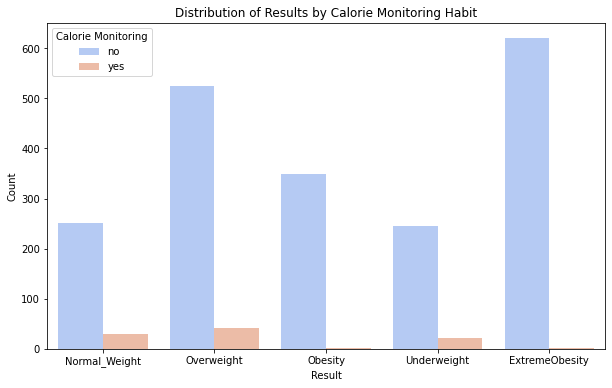

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Result', hue='SCC', palette='coolwarm')
plt.title('Distribution of Results by Calorie Monitoring Habit')
plt.xlabel('Result')
plt.ylabel('Count')
plt.legend(title='Calorie Monitoring')
plt.show()

<Figure size 720x432 with 0 Axes>

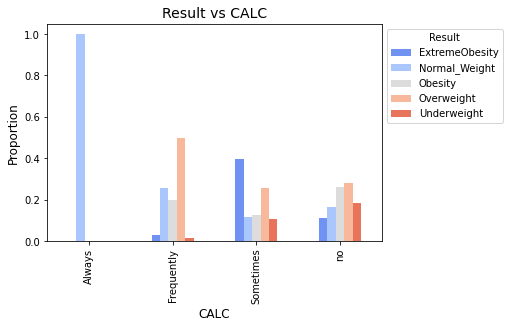

In [109]:
# Creating a cross-tabulation between CALC and Result
cross_tab = pd.crosstab(df['CALC'], df['Result'])

# Normalizing the values for each CALC category
cross_tab = cross_tab.apply(lambda x: x / x.sum(), axis=1)

colors = sns.color_palette('coolwarm', n_colors=len(df['Result'].unique()))

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', color=colors)

plt.xlabel('CALC', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Result vs CALC', fontsize=14)

plt.legend(title='Result', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.margins(0.05)
plt.show()

<Figure size 720x432 with 0 Axes>

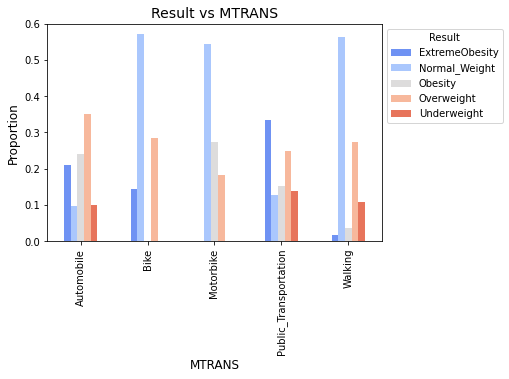

In [73]:
# Creating a cross-tabulation between MTRANS and Result
cross_tab = pd.crosstab(df['MTRANS'], df['Result'])

# Normalizing the values for each MTRANS category
cross_tab = cross_tab.apply(lambda x: x / x.sum(), axis=1)

colors = sns.color_palette('coolwarm', n_colors=len(df['Result'].unique()))

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', color=colors)

plt.xlabel('MTRANS', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Result vs MTRANS', fontsize=14)

plt.legend(title='Result', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.margins(0.05)
plt.show()

**Data Preprocessing**

In [115]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight


In [117]:
#here the weight(kg) and height(m) can be covverted into BMI column and then drop
# Calculating BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Drop Height and Weight columns
df.drop(['Height', 'Weight'], axis=1, inplace=True)

In [118]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Result,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight,28.342381


In [125]:
data = df.copy()

X = data.drop('Result',axis=1)
y = data['Result'].values.reshape(-1)

In [127]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

y = le.fit_transform(y)

In [128]:
X.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,24.386526
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,24.238227
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,23.765432
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,26.851852
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,28.342381


<AxesSubplot: >

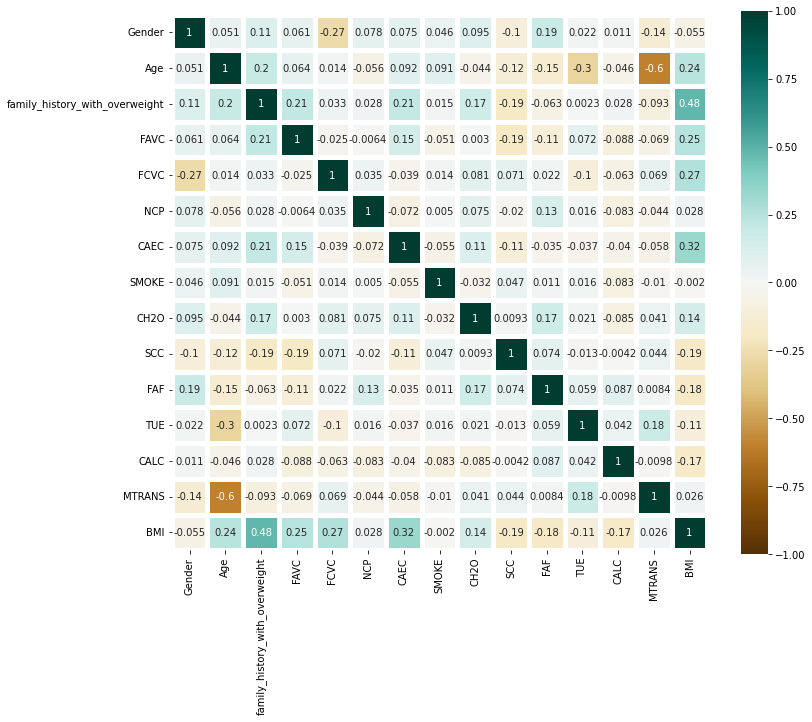

In [134]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

**Model Development**

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
def train_models(X_train, X_test, y_train, y_test):
    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Support Vector Classifier' : SVC()}

    # Training and evaluating each model
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append([model_name, accuracy, precision, recall, f1])

    # Creating a DataFrame to display the results
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    # Print the results
    print(df_results)
    
#function call
train_models(X_train, X_test, y_train, y_test)

                       Model  Accuracy  Precision    Recall  F1 Score
0              Decision Tree  0.971292   0.971362  0.971292  0.971252
1              Random Forest  0.985646   0.985791  0.985646  0.985593
2        Logistic Regression  0.796651   0.796252  0.796651  0.791803
3  Support Vector Classifier  0.928230   0.939126  0.928230  0.922096


In [145]:
#we can see that we can get the best accuracy in random forest classifier when compared to other three models.

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model based on the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Evaluation Metrics for Best Model:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print


Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  0.9868173562784343
Evaluation Metrics for Best Model:
Accuracy:  0.9880382775119617
Precision:  0.9884166239462292
Recall:  0.9880382775119617


<function print>

In [147]:
#after hyper parameter tuning the accuracy has increased by 0.3%